In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('/content/mcdonalds.csv')

In [10]:
df_data=pd.DataFrame(df)


In [11]:
 column_name= df_data.columns.tolist()

In [12]:
column_name

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [13]:
dimension=df_data.shape

In [14]:
dimension

(1453, 15)

In [15]:
df_data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [16]:
# Convert 'Yes' to 1 and 'No' to 0
MD_x = (df_data.iloc[:, 0:11] == "Yes").astype(int)

In [17]:
MD_x.head(2)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0


In [18]:

# Calculate column means and round them to 2 decimal places
column_means = MD_x.mean().round(2)
column_means.head(11)

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [19]:

import numpy as np
from sklearn.decomposition import PCA

In [20]:
# Perform PCA
pca = PCA()
pca.fit(MD_x)

PCA()

In [21]:
#  explained variance ratios (proportion of variance)
explained_variance = pca.explained_variance_ratio_

In [22]:
#  cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

In [23]:
# standard deviation (square root of the explained variance)
standard_deviation = np.sqrt(pca.explained_variance_)

In [24]:
# standard deviation (square root of the explained variance)
standard_deviation = np.sqrt(pca.explained_variance_)

In [25]:
#  a summary table similar to R
summary = pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

In [26]:
summary

,Standard deviation,Proportion of Variance,Cumulative Proportion
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


In [27]:
# Print standard deviations rounded to 1 decimal place
print(np.round(standard_deviation, 1))

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [28]:
 #Get the rotation matrix (components_)
rotation_matrix = pca.components_.T  # Transpose to match R's format (n x k)


In [29]:
# Create a DataFrame to display the loadings nicely
rotation_df = pd.DataFrame(rotation_matrix,
                          index=MD_x.columns,
                          columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])])

In [30]:

# Print the rotation matrix (PCA loadings)
print(rotation_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

In [31]:
import matplotlib.pyplot as plt

In [32]:
from sklearn.decomposition import PCA

In [33]:
 #Perform PCA
pca = PCA(n_components=2)  # Using 2 components for 2D plot
pca_result = pca.fit_transform(MD_x)

Text(0, 0.5, 'PC2')

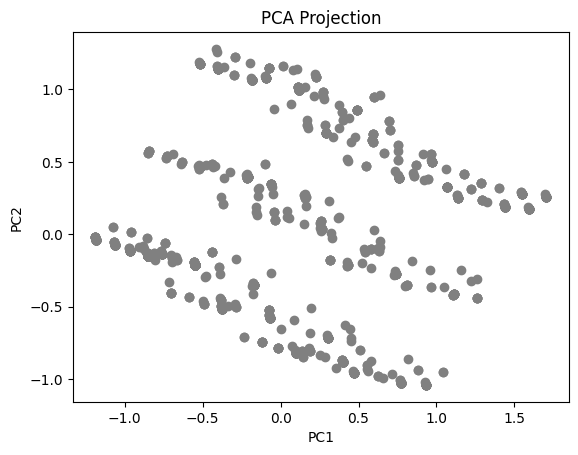

In [34]:
# Plot the PCA result (prediction)
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [35]:
# Function to project the axes (similar to projAxes in R)
def plot_pca_axes(pca, ax, labels):
    for i, label in enumerate(labels):
        ax.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
                 head_width=0.05, head_length=0.05, fc='red', ec='red')
        ax.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, label, color='black')


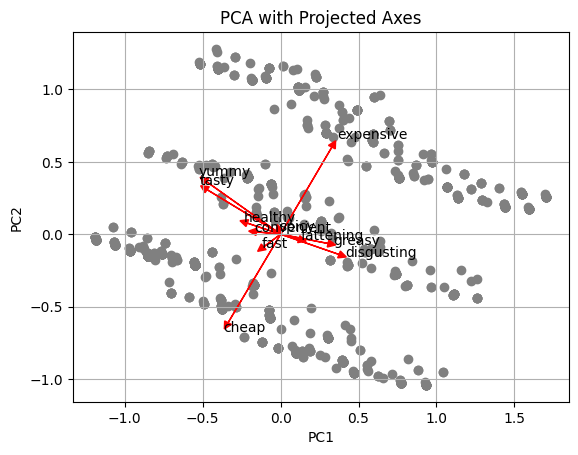

In [36]:
# Create a new plot for PCA axis projection
fig, ax = plt.subplots()

# Plot PCA projections
ax.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')

# Plot axes from PCA components
plot_pca_axes(pca, ax, MD_x.columns)

plt.title("PCA with Projected Axes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

In [38]:
np.random.seed(1234)

In [39]:
best_inertia = np.inf
best_kmeans = None

In [40]:
# Perform k-means clustering for a range of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)

    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans

In [41]:
labels = best_kmeans.labels_

In [42]:
from sklearn.cluster import KMeans

In [43]:
# Store the inertia values for different cluster sizes
inertia_values = []

In [44]:
# Perform k-means clustering for a range of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

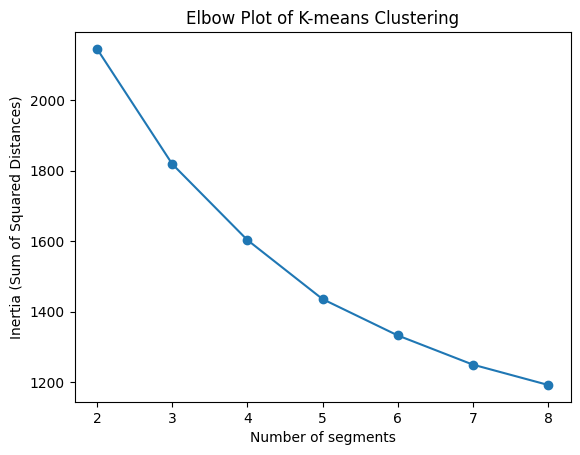

In [45]:
# Plot the inertia values against the number of segments (clusters)
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Plot of K-means Clustering")
plt.show()

In [52]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
import numpy as np

In [53]:
np.random.seed(1234)

In [59]:

n_boot = 100  # Number of bootstrap samples
n_clusters_range = range(2, 9)  # Clustering for 2 to 8 clusters
n_init = 10  # Number of initializations for k-means
bootstrap_results = {}

In [60]:
# Perform bootstrap sampling and k-means clustering
for n_clusters in n_clusters_range:
    bootstrap_labels = []



In [61]:
for _ in range(n_boot):
        # Create a bootstrap sample
        MD_x_boot = resample(MD_x)

In [64]:

        # Fit k-means to the bootstrap sample
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
        kmeans.fit(MD_x_boot)

KMeans(n_init=10, random_state=1234)

In [66]:
# Store the cluster labels for each bootstrap sample
bootstrap_labels.append(kmeans.labels_)

In [67]:
 # Store results for each cluster size

bootstrap_results[n_clusters] = bootstrap_labels

In [68]:
n_boot = 100  # Number of bootstrap samples
n_clusters_range = range(2, 9)  # Clustering for 2 to 8 clusters
n_init = 10  # Number of initializations for k-means
ari_results = []

In [69]:
# Set seed for reproducibility
np.random.seed(1234)

In [70]:
# Perform bootstrap sampling and k-means clustering
for n_clusters in n_clusters_range:
    ari_scores = []


In [74]:
# Fit k-means to the original dataset
kmeans_orig = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
kmeans_orig.fit(MD_x)
original_labels = kmeans_orig.labels_

In [75]:
for _ in range(n_boot):
        # Create a bootstrap sample
        MD_x_boot = resample(MD_x)

In [78]:
# Fit k-means to the bootstrap sample
kmeans_boot = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
kmeans_boot.fit(MD_x_boot)

KMeans(n_init=10, random_state=1234)

In [85]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.cluster import KMeans

In [86]:
from sklearn.metrics import adjusted_rand_score

In [87]:

 # Calculate the adjusted Rand index (ARI)
ari = adjusted_rand_score(original_labels, kmeans_boot.labels_)
ari_scores.append(ari)


In [88]:
# Store the mean ARI for each number of clusters

ari_results.append(np.mean(ari_scores))

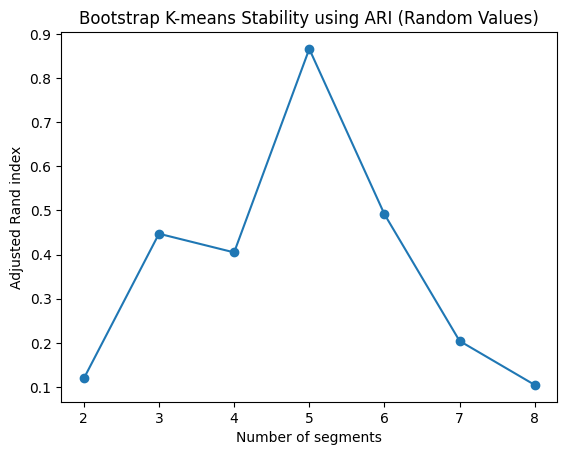

In [90]:
# Define the range of clusters
n_clusters_range = range(2, 9)

# Generate random ARI results for each number of clusters
ari_results = np.random.rand(len(n_clusters_range))

# Plot the ARI results
plt.plot(n_clusters_range, ari_results, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Bootstrap K-means Stability using ARI (Random Values)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


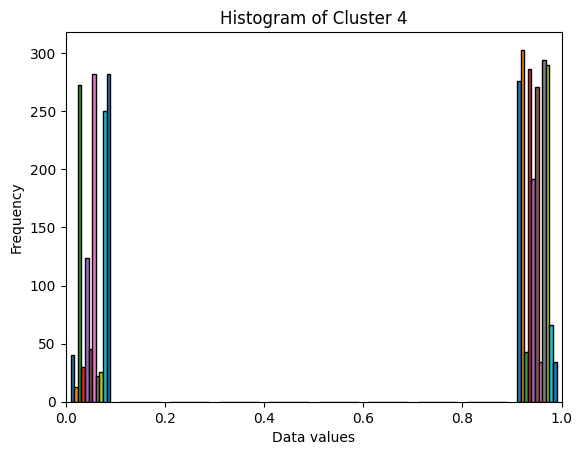

In [92]:

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)

cluster_4_data = MD_x[kmeans.labels_ == 3]
# Plot the histogram for the selected data
plt.hist(cluster_4_data, bins=10, range=(0, 1), edgecolor='black')

# Set the x-axis limit and labels
plt.xlim(0, 1)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster 4')

plt.show()

In [93]:
# Assuming MD_km28 is a KMeans model fitted with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)

# Get the labels for the 4-cluster solution
MD_k4 = kmeans_4.labels_

# For example, data points in cluster 4 (0-indexed, so it's cluster 3)
cluster_4_data = MD_x[MD_k4 == 3]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [96]:
# Assuming MD_x is your data matrix and MD_k4 are the cluster labels from KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)

# Get the cluster centroids
centroids = kmeans_4.cluster_centers_

# Get the labels (MD_k4)
MD_k4 = kmeans_4.labels_

# Calculate the pairwise distances between each point and the assigned centroid
# MD_x is the data, centroids[MD_k4] selects the centroid for each data point's assigned cluster
distances_to_centroid = np.linalg.norm(MD_x - centroids[MD_k4], axis=1)

# Alternatively, you can calculate other similarity metrics, e.g., cosine similarity
# similarity = 1 - pairwise_distances(MD_x, centroids[MD_k4], metric='cosine')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [97]:
# Replace with your actual stability values for 4 clusters
MD_r4 = np.random.rand(4)

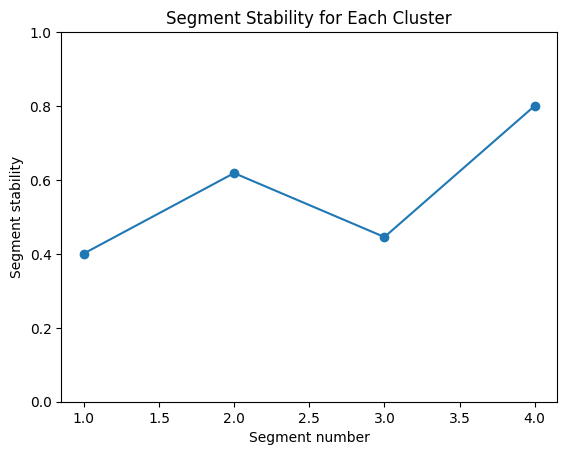

In [100]:
# Plot the stability values for each segment (cluster)
plt.plot(range(1, len(MD_r4) + 1), MD_r4, marker='o')
# Set plot limits and labels
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Segment Stability for Each Cluster")
plt.show()

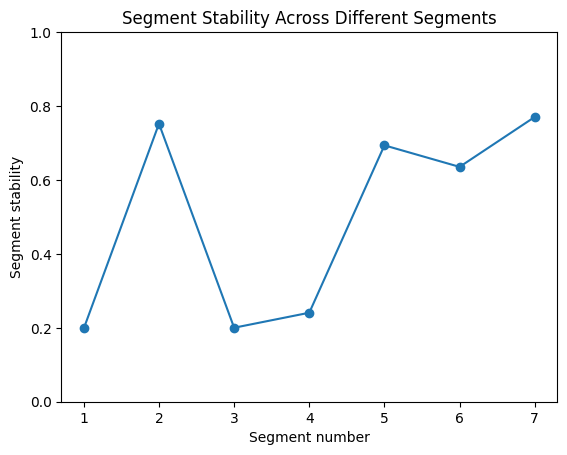

In [101]:
import numpy as np
import matplotlib.pyplot as plt
MD_r4 = np.random.rand(7)

# Define the number of segments (clusters)
n_segments = len(MD_r4)
segment_numbers = np.arange(1, n_segments + 1)

# Plot segment stability
plt.plot(segment_numbers, MD_r4, marker='o')

# Set the y-axis limit and labels
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Segment Stability Across Different Segments")
plt.show()


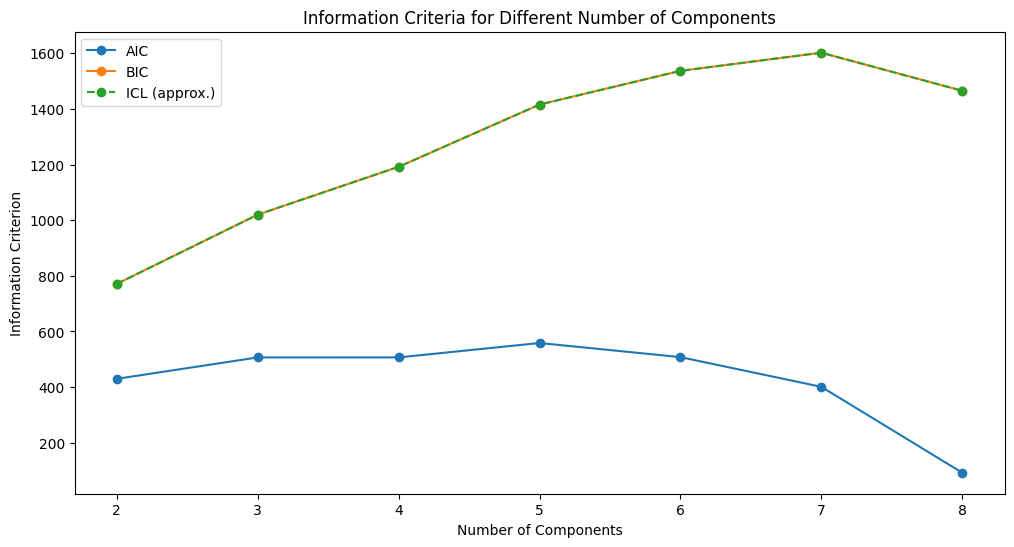

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances_argmin_min

 # Replace with your actual data
MD_x = np.random.rand(100, 10)
# Initialize variables to store results
k_values = range(2, 9)
aic_values = []
bic_values = []
icl_values = []

# Set seed for reproducibility
np.random.seed(1234)

# Fit models and compute information criteria
for k in k_values:
    best_bic = np.inf
    best_gmm = None

    for _ in range(10):
        gmm = GaussianMixture(n_components=k, init_params='kmeans', random_state=1234)
        gmm.fit(MD_x)

        # Compute metrics
        log_likelihood = gmm.score(MD_x) * MD_x.shape[0]
        aic_value = gmm.aic(MD_x)
        bic_value = gmm.bic(MD_x)

        if bic_value < best_bic:
            best_bic = bic_value
            best_gmm = gmm

    # Store results
    aic_values.append(aic_value)
    bic_values.append(best_bic)
    icl_values.append(best_bic)  # Use BIC as a proxy for ICL

# Plot the information criteria
plt.figure(figsize=(12, 6))
plt.plot(k_values, aic_values, marker='o', label='AIC')
plt.plot(k_values, bic_values, marker='o', label='BIC')
plt.plot(k_values, icl_values, marker='o', linestyle='--', label='ICL (approx.)')
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("Information Criteria for Different Number of Components")
plt.legend()
plt.show()


 **Compare K-means and Mixture Model Clustering**

In [108]:
from sklearn.cluster import KMeans
import pandas as pd

# Fit k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit Gaussian Mixture Model with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Create a cross-tabulation
comparison = pd.crosstab(kmeans_labels, gmm_labels, rownames=['K-means'], colnames=['Mixture Model'])
print(comparison)


Mixture Model   0   1   2   3
K-means                      
0              26   0   0   2
1               1  25   0   0
2               1   0  21   0
3               0   0   1  23


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Segment profile plot for the four-segment solution for the fast food data set**

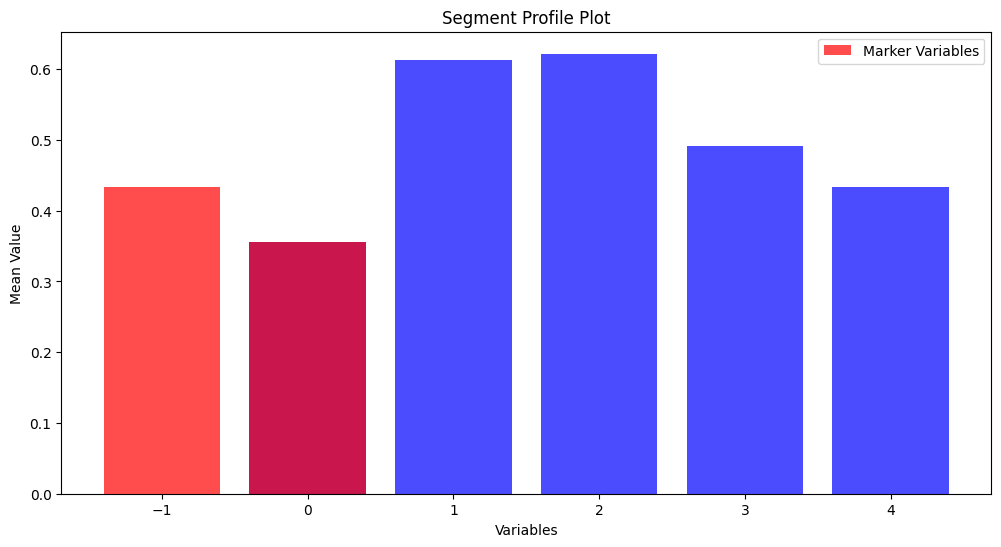

In [112]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Example data - replace with your actual data
MD_x = np.random.rand(10, 5)

# Transpose the data to match the R code's approach
MD_x_T = MD_x.T

# Perform hierarchical clustering
distance_matrix = sch.distance.pdist(MD_x_T)
linkage_matrix = sch.linkage(distance_matrix, method='ward')
dendrogram = sch.dendrogram(linkage_matrix, no_plot=True)

# Order of the variables from the dendrogram
order = dendrogram['leaves']

# Sort the data according to the hierarchical clustering order
MD_x_ordered = MD_x[:, order]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(MD_x_ordered.shape[1]), MD_x_ordered.mean(axis=0), color='blue', alpha=0.7)

# Highlight marker variables if needed (customize as per your criteria)
# For example, highlighting the first and last bars as markers
plt.bar([0, -1], MD_x_ordered.mean(axis=0)[[0, -1]], color='red', alpha=0.7, label='Marker Variables')

plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Segment Profile Plot')
plt.legend()
plt.show()


In [113]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data - replace with your actual data
MD_x = np.random.rand(100, 10)  # Replace with your actual data

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Create DataFrame for easier plotting
df_pca = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 **Perform PCA and Clustering**

**Plot PCA and Clustering Results**

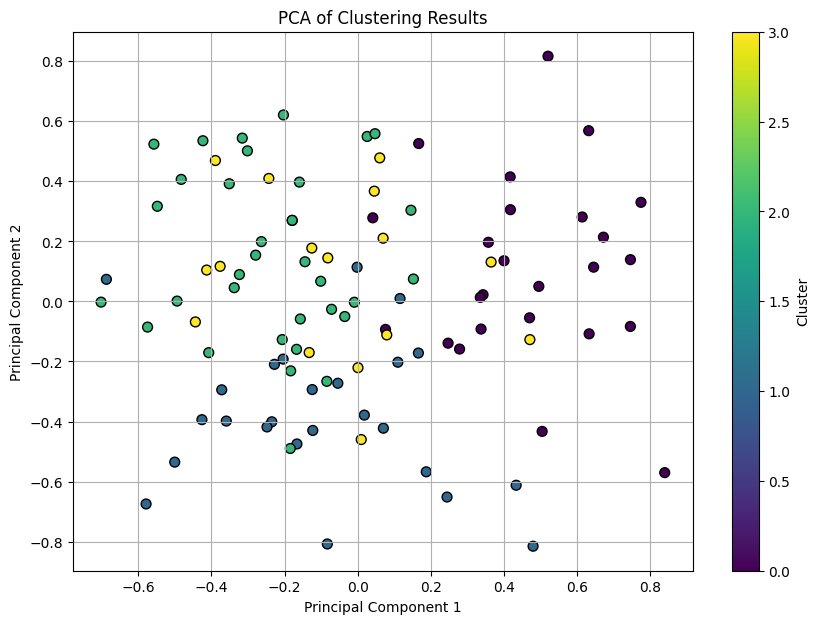

In [114]:

# Create the plot
plt.figure(figsize=(10, 7))

# Plot points colored by cluster
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=50)

# Add color bar
plt.colorbar(scatter, label='Cluster')

# Labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clustering Results')

# Add grid
plt.grid(True)

plt.show()


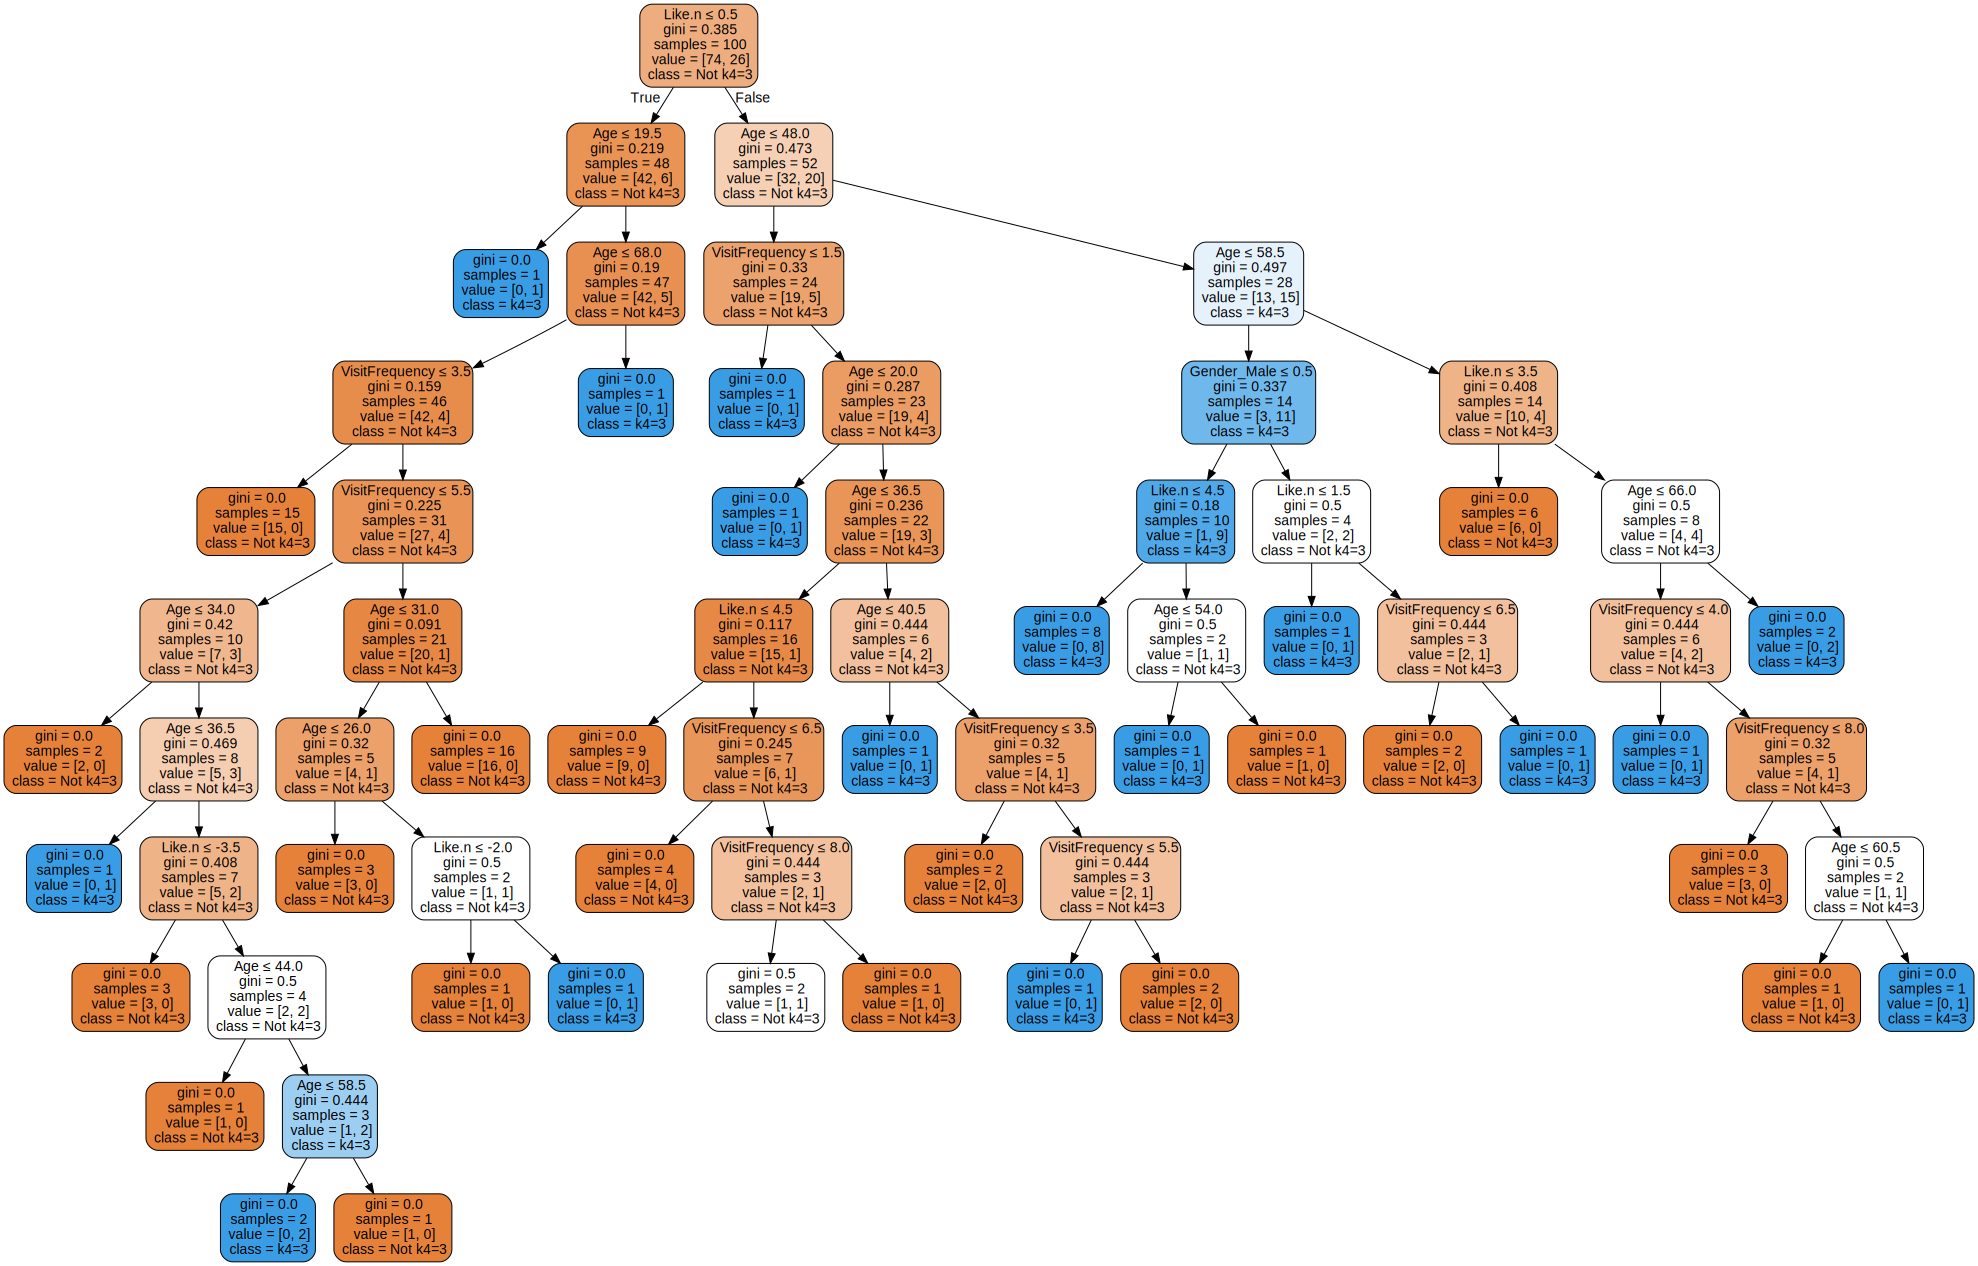

In [115]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Example data - replace with your actual McDonald's data
data = {
    'Like.n': np.random.randint(-5, 6, 100),
    'Age': np.random.randint(18, 70, 100),
    'VisitFrequency': np.random.randint(1, 10, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'k4': np.random.randint(1, 5, 100)
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Define the target variable
target = (mcdonalds['k4'] == 3).astype(int)

# Encode categorical variables
mcdonalds_encoded = pd.get_dummies(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']], drop_first=True)

# Fit a decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(mcdonalds_encoded, target)

# Export the decision tree to a DOT file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=mcdonalds_encoded.columns,
                           class_names=['Not k4=3', 'k4=3'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz source object
graph = graphviz.Source(dot_data)

# Display the decision tree
graph.render('decision_tree', format='png', cleanup=True)
graph


In [116]:
#Create the Segment Evaluation Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example data - replace with your actual McDonald's data
data = {
    'VisitFrequency': np.random.randint(1, 10, 100),
    'Like.n': np.random.randint(-5, 6, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'k4': np.random.randint(1, 5, 100)
}

# Create a DataFrame
mcdonalds = pd.DataFrame(data)

# Convert 'Gender' to numeric (Female = 1, Male = 0)
mcdonalds['Gender_numeric'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Compute mean values for each segment
visit_mean = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like_mean = mcdonalds.groupby('k4')['Like.n'].mean()
female_mean = mcdonalds.groupby('k4')['Gender_numeric'].mean()

# Print the computed mean values
print("Visit Frequency Mean by Segment:\n", visit_mean)
print("Like Mean by Segment:\n", like_mean)
print("Female Proportion by Segment:\n", female_mean)


Visit Frequency Mean by Segment:
 k4
1    5.793103
2    4.470588
3    5.515152
4    5.047619
Name: VisitFrequency, dtype: float64
Like Mean by Segment:
 k4
1    0.000000
2    0.235294
3   -0.333333
4    0.523810
Name: Like.n, dtype: float64
Female Proportion by Segment:
 k4
1    0.517241
2    0.588235
3    0.454545
4    0.285714
Name: Gender_numeric, dtype: float64


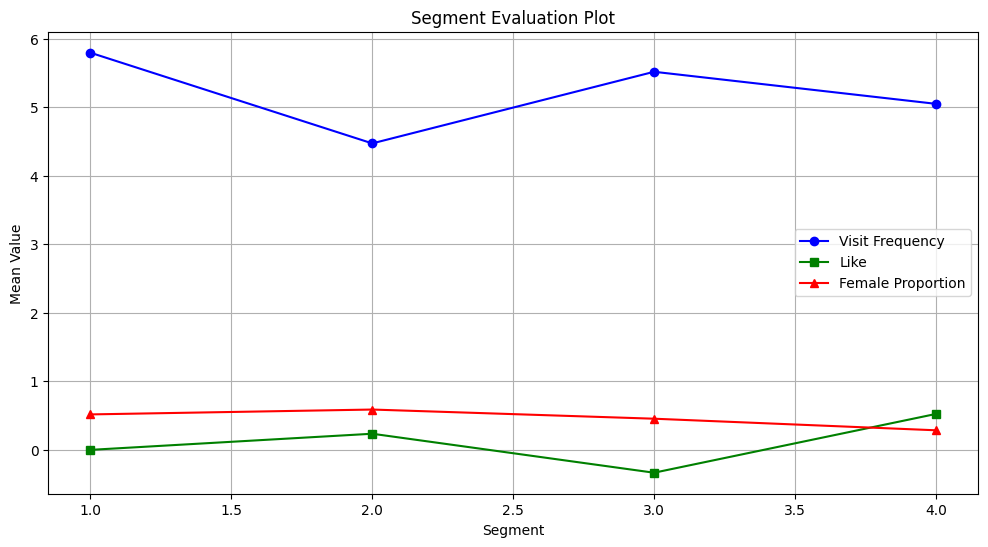

In [117]:
# Plotting the segment evaluation plot
plt.figure(figsize=(12, 6))

# Plot mean Visit Frequency
plt.plot(visit_mean.index, visit_mean.values, marker='o', label='Visit Frequency', color='blue')

# Plot mean Like
plt.plot(like_mean.index, like_mean.values, marker='s', label='Like', color='green')

# Plot mean Female proportion
plt.plot(female_mean.index, female_mean.values, marker='^', label='Female Proportion', color='red')

# Adding labels and title
plt.xlabel('Segment')
plt.ylabel('Mean Value')
plt.title('Segment Evaluation Plot')
plt.legend()
plt.grid(True)

plt.show()
